In [1]:
import sys # need to save the stdout, for whatever reason some other module is resetting things
stdout=sys.stdout

from ROOT import TFile
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline

Welcome to JupyROOT 6.08/06


In [2]:
reload(sys)
sys.stdout = stdout

# Load the data

In [3]:
weightsFile=TFile.Open("degALL_a0a2Test_treeFlat_DSelector_UTweights.root")
nentries=weightsFile.degALL_a0a2Test_tree_flat.GetEntries()
UT_weightBS=np.zeros(nentries)
UT_equalWeights=np.zeros(nentries)
UT_bestChiWeights=np.zeros(nentries)
UT_spectBestChiWeights=np.zeros(nentries)
UT_spectEqualWeights=np.zeros(nentries)
UT_spectProbWeights=np.zeros(nentries)
UT_probWeights=np.zeros(nentries)
UT_chiSqs=np.zeros(nentries)
UT_nonUniqueEventNums=np.zeros(nentries)
UT_events=np.zeros(nentries)
UT_RFtimes=np.zeros(nentries)
UT_whichSignalRegions=np.zeros(nentries)
UT_isTruePi0Etas=np.zeros(nentries)
UT_beamPhotonMatchToThrowns=np.zeros(nentries)
UT_beamIDs=np.zeros(nentries)

UT_Mpi0etas=np.zeros(nentries)
UT_Mpi0etas_thrown=np.zeros(nentries)
UT_Mpi0s=np.zeros(nentries)
UT_Metas=np.zeros(nentries)
UT_Mpi0etas_meas=np.zeros(nentries)
UT_Mpi0s_meas=np.zeros(nentries)
UT_Metas_meas=np.zeros(nentries)
UT_Mpi0ps=np.zeros(nentries)
UT_Metaps=np.zeros(nentries)
UT_cosTheta_eta_gjs=np.zeros(nentries)
UT_cosTheta_eta_gjs_meas=np.zeros(nentries)


UT_AccWeights=np.zeros(nentries)


for ievent,event in enumerate(weightsFile.degALL_a0a2Test_tree_flat):
    UT_weightBS[ievent]=event.weightBS
    UT_equalWeights[ievent]=event.UT_equalWeights
    UT_chiSqs[ievent]=event.chiSq
    UT_bestChiWeights[ievent]=event.UT_bestChiWeights
    UT_spectBestChiWeights[ievent]=event.UT_spectBestChiWeights
    UT_spectEqualWeights[ievent]=event.UT_spectEqualWeights
    UT_spectProbWeights[ievent]=event.UT_spectProbWeights
    UT_probWeights[ievent]=event.UT_probWeights
    UT_events[ievent]=event.UT_uniqueEventNumbers
    UT_nonUniqueEventNums[ievent]=event.event
    UT_RFtimes[ievent]=event.rfTime
    UT_whichSignalRegions[ievent]=event.whichSignalRegion
    UT_isTruePi0Etas[ievent]=event.isTruePi0Eta
    UT_beamPhotonMatchToThrowns[ievent]=event.beamPhotonMatchToThrown
    UT_beamIDs[ievent]=event.beamID
    UT_cosTheta_eta_gjs[ievent]=event.cosTheta_eta_gj
    UT_cosTheta_eta_gjs_meas[ievent]=event.cosTheta_eta_gj_meas
    
    UT_Mpi0etas[ievent]=event.Mpi0eta
    UT_Mpi0etas_thrown[ievent]=event.Mpi0eta_thrown
    UT_Mpi0etas_meas[ievent]=event.Mpi0eta_meas
    UT_Mpi0s[ievent]=event.Mpi0
    UT_Mpi0s_meas[ievent]=event.Mpi0_meas
    UT_Metas[ievent]=event.Meta
    UT_Metas_meas[ievent]=event.Meta_meas
    UT_Mpi0ps[ievent]=event.Mpi0p
    UT_Metaps[ievent]=event.Metap
    UT_AccWeights[ievent]=event.AccWeight

In [4]:
weightsDict={"equalWeights":UT_equalWeights,
             "weightBS":UT_weightBS,
             "chiSqs":UT_chiSqs,
             "bestChiWeights":UT_bestChiWeights,
             "spectBestChiWeights":UT_spectBestChiWeights,
             "spectEqualWeights":UT_spectEqualWeights,
             "spectProbWeights":UT_spectProbWeights,
             "probWeights":UT_probWeights,
             "eventNumber":UT_events,
             "nonUniqueEventNumber":UT_nonUniqueEventNums,
             "rfTimes":UT_RFtimes,
             "whichSignalRegions":UT_whichSignalRegions,
             "isTruePi0Etas":UT_isTruePi0Etas,
             "beamPhotonMatchToThrowns":UT_beamPhotonMatchToThrowns,
             "beamIDs":UT_beamIDs,
             "cosTheta_eta_gjs":UT_cosTheta_eta_gjs,
             "cosTheta_eta_gjs_meas":UT_cosTheta_eta_gjs_meas,
             "Mpi0eta_thrown":UT_Mpi0etas_thrown,
             "Mpi0etas":UT_Mpi0etas,
             "Mpi0etas_meas":UT_Mpi0etas_meas,
             "Mpi0s":UT_Mpi0s,
             "Mpi0s_meas":UT_Mpi0s_meas,
             "Metas":UT_Metas,
             "Metas_meas":UT_Metas_meas,
             "Mpi0ps":UT_Mpi0ps,
             "Metaps":UT_Metaps,
             "AccWeights":UT_AccWeights
            }
df_weightsData=pd.DataFrame(weightsDict)

In [5]:
# Convert to bools
df_weightsData.beamPhotonMatchToThrowns=df_weightsData.beamPhotonMatchToThrowns.astype(bool)
df_weightsData.isTruePi0Etas=df_weightsData.isTruePi0Etas.astype(bool)

# Fill nan values to 0. This is from getting the p-values for large chiSqs.
df_weightsData.probWeights=df_weightsData.probWeights.fillna(0)

# Load the thrown information

In [6]:
# weightsFile=TFile.Open("degALL_a0a2Test_tree_DSelector.root")
# nentries=weightsFile.pi0eta__B4_M17_M7_Tree.GetEntries()
# thrown_Mpi0etas=np.zeros(nentries)
# thrown_events=np.zeros(nentries)

# for ievent,event in enumerate(weightsFile.pi0eta__B4_M17_M7_Tree):
#     thrown_Mpi0etas[ievent]=event.Mpi0eta_thrown
#     thrown_events[ievent]=event.EventNumber
    
# thrownDict={
#     "Mpi0etas":thrown_Mpi0etas,
#     "events":thrown_events
# }
# df_thrownData=pd.DataFrame(thrownDict)

# Make some checks

## Check number of events in the thrown and recon matches

### Make sure the total weight for all the tracking schemes agree

We had to do some unscrambling of event numbers due to MC producing multiple events with the same event number. After unscrambling lets see if the maximum event number agrees with the length of the thrownData. In principle the thrown data should have N events which should agree with the max event number after unscrambling

In [7]:
print("Weights data max eventNum: {0}".format(df_weightsData.eventNumber.max()))
#print("Thrown data length: {0}".format(len(df_thrownData)))
#assert(len(df_thrownData)==df_weightsData.eventNumber.max())
# Make sure the events are the same between the two root files
#np.prod(np.unique(UT_events)==np.unique(thrown_events))

Weights data max eventNum: 127370.0


Checking to see if the integrated weights are the same between the 3 different tracking schemes

In [8]:
sumWeighted=df_weightsData.equalWeights.sum()
sumBestChi=df_weightsData.bestChiWeights.sum()
sumProbWeights=df_weightsData.probWeights.sum()

#sumThrown=len(df_thrownData["Mpi0etas"])

print("Sum weights = equal: {0}, bestChi: {1}, prob: {2}".format(sumWeighted,sumBestChi,sumProbWeights))

Sum weights = equal: 127370.0, bestChi: 127370.0, prob: 127370.0


In [9]:
countProbWeights=df_weightsData[["equalWeights","bestChiWeights","probWeights",
                                 "eventNumber"]].groupby("eventNumber").sum()["probWeights"]
countNotOne=len(countProbWeights[abs(countProbWeights-1.0)>0.01])
sumNotOne=sum(countProbWeights[abs(countProbWeights-1.0)>0.01])
print("If we include the pValues with that ended with all 0s (due to normalization)"\
      "we get {0}".format(countNotOne+sumProbWeights))
print("Hopefully the sum is 0: sum={0}".format(sumNotOne))

# make sure the counts make sense at this point
assert(abs(sumWeighted-(countNotOne+sumProbWeights))<0.001)

If we include the pValues with that ended with all 0s (due to normalization)we get 127370.0
Hopefully the sum is 0: sum=0


### Make sure the total weight agrees among the spectroscopic tracking scheme

In [10]:
df_weightsDataSubset=df_weightsData[["eventNumber","beamIDs","spectBestChiWeights","spectEqualWeights",
                                     "spectProbWeights"]]
print(df_weightsDataSubset.groupby(["eventNumber","beamIDs"]).sum().sum())
grouped=df_weightsDataSubset.groupby(["eventNumber","beamIDs"]).sum()
numBeamWithZeroWeights=(grouped.spectProbWeights==0).sum()
print("The remainder of spectProbWeights should have been pValues=0 due to precision of converting"\
     "chiSq to pValues. If pValue and Normalization is small then we get a NaN or 0")
print("Num beam photons with zero spectProbWeight: {0}".format(numBeamWithZeroWeights))

spectBestChiWeights    290223.0
spectEqualWeights      290223.0
spectProbWeights       290223.0
dtype: float64
The remainder of spectProbWeights should have been pValues=0 due to precision of convertingchiSq to pValues. If pValue and Normalization is small then we get a NaN or 0
Num beam photons with zero spectProbWeight: 0


## Checking how accidentals are subtracted in the RF time plot

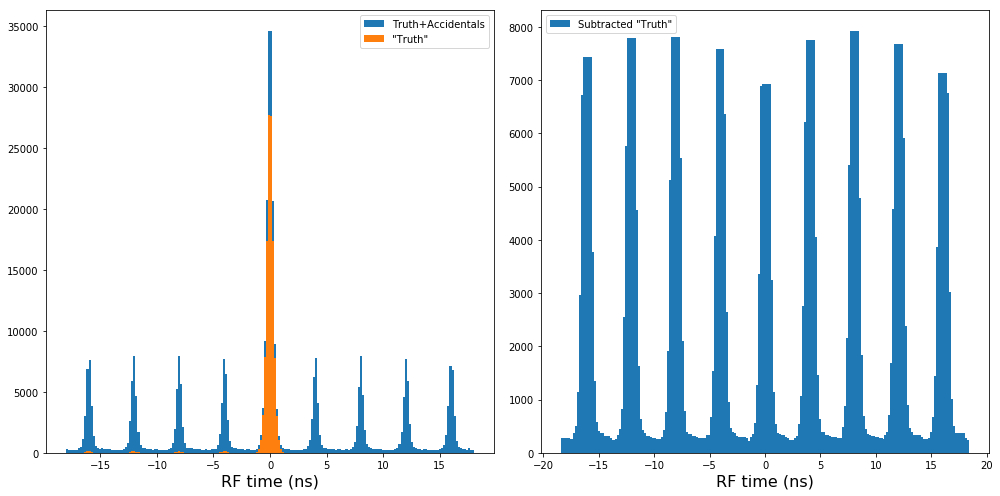

In [11]:
fig,ax=plt.subplots(1,2,figsize=(14,7))
counts, binedges=np.histogram(df_weightsData.rfTimes,bins=200)
countsTruth=np.histogram(df_weightsData[df_weightsData.beamPhotonMatchToThrowns==True].rfTimes,bins=binedges)[0]
plot1=ax[0].hist(df_weightsData.rfTimes,bins=binedges,label="Truth+Accidentals")
plot2=ax[0].hist(df_weightsData[df_weightsData.beamPhotonMatchToThrowns==True].rfTimes,
                 bins=binedges,label='"Truth"')

numTrue=sum(df_weightsData.beamPhotonMatchToThrowns==True)
numPrompt=len(df_weightsData[(df_weightsData.rfTimes>-2) & (df_weightsData.rfTimes<2)])
numAcc=len(df_weightsData[(df_weightsData.rfTimes<-2) | (df_weightsData.rfTimes>2)])

ax[0].legend()
ax[0].set_xlabel("RF time (ns)",size=16)
plot3=ax[1].bar(np.linspace(-18,18,200),height=(plot1[0]-plot2[0]),label='Subtracted "Truth"')
ax[1].set_xlabel("RF time (ns)",size=16)
ax[1].legend()
plt.tight_layout()

## Checking total number of combos

Text(0.5,1,'Density plot of combos with True Beam Photons')

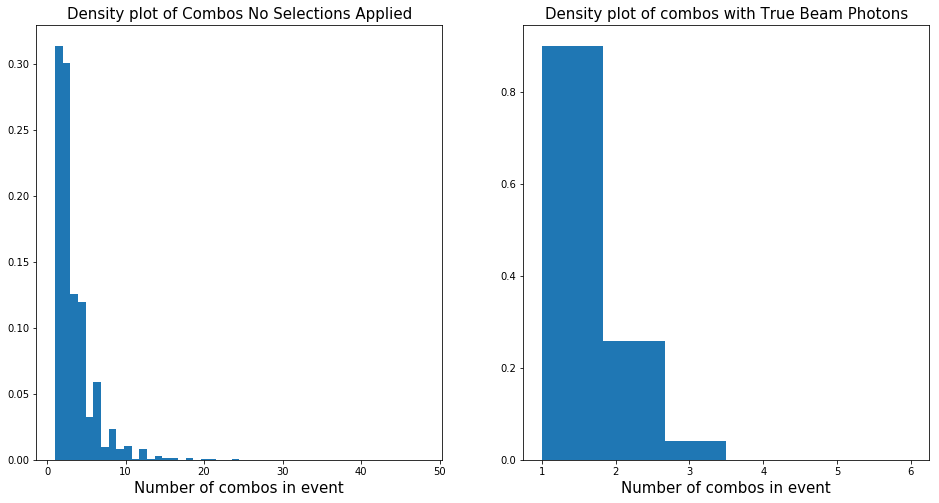

In [14]:
combosPerEvent=1/df_weightsData.groupby("eventNumber").equalWeights.first()
fig,ax = plt.subplots(1,2,figsize=(16,8))
ax[0].hist(combosPerEvent,bins=int(combosPerEvent.max()),density=True)
ax[0].set_xlabel("Number of combos in event",size=15)
ax[0].set_title("Density plot of Combos No Selections Applied",size=15)

numSpectCombos=df_weightsData[df_weightsData.beamPhotonMatchToThrowns].eventNumber.value_counts().values
ax[1].hist(numSpectCombos,density=True,bins=numSpectCombos.max())
ax[1].set_xlabel("Number of combos in event",size=15)
ax[1].set_title("Density plot of combos with True Beam Photons",size=15)

I suspect that the distribution of the number of unique combos differ between the a0 and a2 cases. The a0 case should have a bunch more combinatorics so we will not have as much events with only 1 or 2 combos.

In [17]:
numSpectCombos=df_weightsData[df_weightsData.beamPhotonMatchToThrowns].eventNumber.value_counts()

In [18]:
twoComboIndicies=numSpectCombos[numSpectCombos==2].index
df_weightsDataTrueBeam=df_weightsData[df_weightsData.beamPhotonMatchToThrowns]
df_weightsDataTrueBeam[["chiSqs","Metas","Mpi0s","spectProbWeights","spectEqualWeights",
                        "beamPhotonMatchToThrowns"]][df_weightsDataTrueBeam.eventNumber==twoComboIndicies[4]]

,chiSqs,Metas,Mpi0s,spectProbWeights,spectEqualWeights,beamPhotonMatchToThrowns
320683,2.06217,0.551223,0.128284,0.5,0.5,True
320684,2.06217,0.673314,0.152353,0.5,0.5,True


In [19]:
singleChiEvents=df_weightsDataTrueBeam.groupby("eventNumber").chiSqs.nunique().eq(1)

In [20]:
notSingleChiEvents=df_weightsDataTrueBeam.groupby("eventNumber").chiSqs.nunique().ne(1)

In [21]:
1.*sum(notSingleChiEvents)/sum(singleChiEvents)

0.002019109826334488

In [22]:
indNotSingleChi=notSingleChiEvents[notSingleChiEvents].index
df_weightsDataTrueBeam[["chiSqs","Metas","Mpi0s","spectProbWeights","spectEqualWeights",
                        "beamPhotonMatchToThrowns","beamIDs","isTruePi0Etas"]][
    df_weightsDataTrueBeam.eventNumber==indNotSingleChi[0]]

,chiSqs,Metas,Mpi0s,spectProbWeights,spectEqualWeights,beamPhotonMatchToThrowns,beamIDs,isTruePi0Etas
1541,7.383269,0.580512,0.096797,0.302117,0.5,True,7.0,True
1549,5.171045,0.574342,0.103305,0.697883,0.5,True,7.0,False


In [23]:
grouped=df_weightsDataTrueBeam.groupby("eventNumber")
groupedTruePi0Etas=grouped.isTruePi0Etas.any()
hasTruePi0eta=groupedTruePi0Etas[groupedTruePi0Etas].index
df_trueBeamHasTruePi0Eta=df_weightsDataTrueBeam[df_weightsDataTrueBeam.eventNumber.isin(hasTruePi0eta)]

In [24]:
minChis=df_trueBeamHasTruePi0Eta.groupby("eventNumber").chiSqs.min()
grouped2=df_trueBeamHasTruePi0Eta.groupby(["eventNumber","isTruePi0Etas"])
grouped2=grouped2.chiSqs.min()

In [25]:
grouped2.reset_index().groupby("eventNumber")["chiSqs","isTruePi0Etas"]

In [78]:
grouped2.groupby("eventNumber")["isTruePi0Etas"]#.len()

KeyError: 'Column not found: isTruePi0Etas'

In [71]:
rangeMinTrue=grouped2[:10].reset_index().groupby("eventNumber").agg(
    lambda x: len(x))

In [72]:
rangeMinTrue

,isTruePi0Etas,chiSqs
eventNumber,,
1.0,1,1.0
2.0,2,2.0
3.0,1,1.0
4.0,2,2.0
7.0,2,2.0
8.0,1,1.0
9.0,1,1.0


In [ ]:
grouped2.reset_index()

In [ ]:
sum(rangeMinTrue!=0)

In [ ]:
rangeMinTrue[rangeMinTrue!=0]

## Checking effects of accidental subtraction on various mass plots

In [ ]:
fig,axes=plt.subplots(8,2,figsize=(18,36))
# Selecting True beam photons and then selecting non-True beam photons. Plotting the Meta/Mpi0/Mpi0eta
# distributions
for i,isTrueBeam in enumerate([True,False]):
    df_weightsDataSubset=df_weightsData[df_weightsData.beamPhotonMatchToThrowns==isTrueBeam]
    axes=axes.flatten()
    axes[0+i*4].hist2d(df_weightsDataSubset.Mpi0s,df_weightsDataSubset.Metas,
                       bins=(100,100),range=[[0.075,0.2],[0.4,0.7]]
                      )
    axes[0+i*4].set_xlabel("Mpi0_KIN",size=18)
    axes[0+i*4].set_ylabel("Meta_KIN",size=18)
    axes[1+i*4].hist2d(df_weightsDataSubset.Mpi0s_meas,df_weightsDataSubset.Metas_meas,
                       bins=(100,100),range=[[0.075,0.2],[0.4,0.7]]
                      )
    axes[1+i*4].set_xlabel("Mpi0_MEAS",size=18)
    axes[1+i*4].set_ylabel("Meta_MEAS",size=18)
    axes[2+i*4].hist(df_weightsDataSubset.Mpi0etas,bins=100)
    axes[2+i*4].set_xlabel("Mpi0eta_KIN",size=18)
    axes[3+i*4].hist(df_weightsDataSubset.Mpi0etas_meas,bins=100)
    axes[3+i*4].set_xlabel("Mpi0eta_MEAS",size=18)

    
# Accidental Weighted    
axes[8].hist2d(df_weightsData.Mpi0s,df_weightsData.Metas, weights=df_weightsData.AccWeights,
                       bins=(100,100),range=[[0.075,0.2],[0.4,0.7]]
                      )
axes[8].set_xlabel("Mpi0_KIN",size=18)
axes[8].set_ylabel("Meta_KIN",size=18)
axes[9].hist2d(df_weightsData.Mpi0s_meas,df_weightsData.Metas_meas, weights=df_weightsData.AccWeights,
                       bins=(100,100),range=[[0.075,0.2],[0.4,0.7]]
                      )
axes[9].set_xlabel("Mpi0_MEAS",size=18)
axes[9].set_ylabel("Meta_MEAS",size=18)
axes[10].hist(df_weightsData.Mpi0etas,bins=100, weights=df_weightsData.AccWeights)
axes[10].set_xlabel("Mpi0eta_KIN",size=18)
axes[11].hist(df_weightsData.Mpi0etas_meas,bins=100, weights=df_weightsData.AccWeights)
axes[11].set_xlabel("Mpi0eta_MEAS",size=18)


# Both true and accidentals but not accidental weighted
axes[12].hist2d(df_weightsData.Mpi0s,df_weightsData.Metas,
                       bins=(100,100),range=[[0.075,0.2],[0.4,0.7]]
                      )
axes[12].set_xlabel("Mpi0_KIN",size=18)
axes[12].set_ylabel("Meta_KIN",size=18)
axes[13].hist2d(df_weightsData.Mpi0s_meas,df_weightsData.Metas_meas,
                       bins=(100,100),range=[[0.075,0.2],[0.4,0.7]]
                      )
axes[13].set_xlabel("Mpi0_MEAS",size=18)
axes[13].set_ylabel("Meta_MEAS",size=18)
axes[14].hist(df_weightsData.Mpi0etas,bins=100)
axes[14].set_xlabel("Mpi0eta_KIN",size=18)
axes[15].hist(df_weightsData.Mpi0etas_meas,bins=100)
axes[15].set_xlabel("Mpi0eta_MEAS",size=18)
    
plt.tight_layout()
plt.rcParams.update({'font.size': 12})

Compare the Mpi0eta distribution of the "True" beam combos with the accidentally subtracted combos

In [ ]:
binedges=np.histogram(df_weightsData.Mpi0etas,bins=100)[1]
df_weightsDataSubset=df_weightsData[df_weightsData.beamPhotonMatchToThrowns==1]
fig,ax=plt.subplots(1,1)
ax.hist(df_weightsData.Mpi0etas,bins=binedges, weights=df_weightsData.AccWeights,label="Acc Subbed",alpha=0.3)
ax.hist(df_weightsDataSubset.Mpi0etas,bins=binedges, label='"True"',alpha=0.3)
ax.set_xlabel("Mpi0eta_KIN",size=18)
ax.set_xlabel("Mpi0eta_KIN",size=18)
ax.legend()

## Checking accidental subtraction on GJ angles

In [ ]:
fig,axes=plt.subplots(3,2,figsize=(18,12))
axes=axes.flatten()
labels=["True","Accidental"]
for i,isTrueBeam in enumerate([True,False]):
    df_weightsDataSubset=df_weightsData[df_weightsData.beamPhotonMatchToThrowns==isTrueBeam]
    axes[2*i].hist2d(df_weightsDataSubset.Mpi0etas,df_weightsDataSubset.cosTheta_eta_gjs,
                   bins=(100,100),range=[[0,3],[-1,1]],label="1231")
    axes[2*i].set_xlabel("Mpi0eta_KIN",size=18)
    axes[2*i].set_ylabel("cosThetaGJ_KIN",size=18)
    axes[2*i+1].hist2d(df_weightsDataSubset.Mpi0etas_meas,df_weightsDataSubset.cosTheta_eta_gjs_meas,
                   bins=(100,100),range=[[0,3],[-1,1]],label=labels[i])
    axes[2*i+1].set_xlabel("Mpi0eta_MEAS",size=18)
    axes[2*i+1].set_ylabel("cosThetaGJ_MEAS",size=18)
    
axes[4].hist2d(df_weightsData.Mpi0etas,df_weightsData.cosTheta_eta_gjs,
               bins=(100,100),range=[[0,3],[-1,1]],label=labels[i],
               weights=df_weightsData.AccWeights
              )
axes[4].set_xlabel("Mpi0eta_KIN",size=18)
axes[4].set_ylabel("cosThetaGJ_KIN",size=18)

axes[5].hist2d(df_weightsData.Mpi0etas_meas,df_weightsData.cosTheta_eta_gjs_meas,
                bins=(100,100),range=[[0,3],[-1,1]],label=labels[i],
                weights=df_weightsData.AccWeights
              )
axes[5].set_xlabel("Mpi0eta_MEAS",size=18)
axes[5].set_ylabel("cosThetaGJ_MEAS",size=18)
plt.tight_layout()
plt.savefig("combinatoricStudy/comboTrackingGJ.png")

Check the GJ angle explicity

In [ ]:
fig,axes=plt.subplots(1,2,figsize=(14,6))
axes=axes.flatten()
labels=["TrueBeam"]
binedges=np.histogram(df_weightsDataSubset.cosTheta_eta_gjs,bins=50)[1]
for i,isTrueBeam in enumerate([True]):
    df_weightsDataSubset=df_weightsData[df_weightsData.beamPhotonMatchToThrowns==isTrueBeam]
    axes[0].hist(df_weightsDataSubset.cosTheta_eta_gjs,label=labels[i],histtype=u'step',bins=binedges,
                linewidth=2)
    axes[0].set_xlabel("cosThetaGJ_KIN",size=18)
    axes[1].hist(df_weightsDataSubset.cosTheta_eta_gjs_meas,label=labels[i],histtype=u'step',bins=binedges,
                linewidth=2)
    axes[1].set_xlabel("cosThetaGJ_MEAS",size=18)
    
axes[0].hist(df_weightsData.cosTheta_eta_gjs,
               weights=df_weightsData.AccWeights, label="Accidental Subtracted",histtype=u'step',bins=binedges
              )

axes[1].hist(df_weightsData.cosTheta_eta_gjs_meas,
                weights=df_weightsData.AccWeights, label="Accidental Subtracted",histtype=u'step',bins=binedges
              )
axes[0].legend()
axes[1].legend()
plt.tight_layout()

## Checking Mpi0eta distributions and compare tracking + accidental subtraction

In [ ]:
fig,ax=plt.subplots(1,3,figsize=(16,6))
binedges=np.histogram(df_weightsData.Mpi0eta_thrown,bins=200)[1]


df_weightsData.Mpi0eta_thrown.plot(kind="hist",histtype=u'step',bins=binedges,alpha=0.7,ax=ax[0])
df_weightsData.Mpi0etas.plot(kind="hist",histtype=u'step',bins=binedges,alpha=0.5,ax=ax[0])
ax[0].axvline(1.32,c='red',label="a2(1320)",alpha=0.5)
ax[0].axvline(0.98,c='red',label="a0(980)",alpha=0.5)
ax[0].set_title("No Selections")


df_weightsData.Mpi0eta_thrown[df_weightsData.beamPhotonMatchToThrowns].plot(kind="hist",bins=binedges
                                                ,histtype=u'step',alpha=0.7,ax=ax[1])
df_weightsData.Mpi0etas.plot(kind="hist",histtype=u'step',bins=binedges,
                             weights=df_weightsData.AccWeights,ax=ax[1])
ax[1].axvline(1.32,c='red',label="a2(1320)",alpha=0.5)
ax[1].axvline(0.98,c='red',label="a0(980)",alpha=0.5)
ax[1].set_title("TrueBeam vs AccSub")


df_weightsData.Mpi0eta_thrown[(df_weightsData.beamPhotonMatchToThrowns) & (df_weightsData.isTruePi0Etas)].plot(
    kind="hist",bins=binedges,histtype=u'step',alpha=0.7,ax=ax[2])
df_weightsData.Mpi0etas.plot(kind="hist",histtype=u'step',
                             bins=binedges,weights=df_weightsData.AccWeights*df_weightsData.spectBestChiWeights,
                             ax=ax[2])
ax[2].axvline(1.32,c='red',label="a2(1320)",alpha=0.5)
ax[2].axvline(0.98,c='red',label="a0(980)",alpha=0.5)
ax[2].set_title("TrueBeamPi0Eta vs AccSubSpectTrack")

plt.tight_layout()

In [ ]:
fig = plt.figure(figsize=(18, 6))
ax1= fig.add_subplot(2,2,1)
ax2= fig.add_subplot(2,2,2)


# df_weightsDataSubset hold True beam and df_trueBeamPi0eta holds True beam+pi0eta
df_weightsDataSubset=df_weightsData[df_weightsData.beamPhotonMatchToThrowns==True]
df_trueBeamPi0eta=df_weightsData[(df_weightsData.beamPhotonMatchToThrowns) & (df_weightsData.isTruePi0Etas)]
binedges=np.histogram(df_weightsDataSubset.Mpi0etas,bins=200)[1]

df_weightsDataSubset.Mpi0etas.plot(kind="hist",bins=binedges,
                                   label="TrueBeam"+"\n  integral="+str(len(df_weightsDataSubset)),
                                   ax=ax1,alpha=0.7)
df_weightsData.Mpi0etas.plot(kind="hist",bins=binedges,ax=ax1,
                             weights=df_weightsData.AccWeights,alpha=0.5,
                             label="Accidental Subtracted"+"\n  integral="+str(sum(df_weightsData.AccWeights))
                            )
percentDifference=int(len(df_weightsDataSubset)/sum(df_weightsData.AccWeights)*1000)/10.0
ax1.set_title("Integral TrueBeam/AccSub="+str(percentDifference)+"%",size=15)
ax1.legend(prop={'size': 12})
ax1.set_xlabel("Mpi0eta",size=15)

df_weightsDataSubset.Mpi0etas.plot(kind="hist",bins=binedges,label="TrueBeam",ax=ax2,alpha=0.7)
df_trueBeamPi0eta.Mpi0etas.plot(kind="hist",bins=binedges,label="TrueBeam+TruePi0eta",ax=ax2,alpha=0.5)
ax2.legend(prop={'size': 12})
ax2.set_xlabel("Mpi0eta",size=15)
plt.savefig("combinatoricStudy/Mpi0eta.png")


fig = plt.figure(figsize=(18, 12))
ax3= fig.add_subplot(1,1,1)
integralTrue=len(df_trueBeamPi0eta)
df_trueBeamPi0eta.Mpi0etas.plot(kind="hist",bins=binedges,
                                label="TrueBeam+TruePi0eta"+" || integral="+str(integralTrue),
                                ax=ax3,alpha=1,histtype=u'step',linewidth=3)
# df_weightsDataSubset.Mpi0etas.plot(kind="hist",bins=binedges,label="TrueBeam\n+ spectBestChi",ax=ax3,
#                                    histtype=u'step',linewidth=2,alpha=0.5,
#                                    weights=df_weightsDataSubset.spectBestChiWeights)
integralSpectSub=sum(df_weightsData.AccWeights*df_weightsData.spectBestChiWeights)
df_weightsData.Mpi0etas.plot(kind="hist",bins=binedges,ax=ax3,histtype=u'step',linewidth=3,
                             weights=df_weightsData.AccWeights*df_weightsData.spectBestChiWeights,
                             alpha=0.5,
                             label="Accidental Subtracted\n+ spectBestChi"+" || integral="+str(integralSpectSub)
                            )
df_weightsData.Mpi0etas.plot(kind="hist",bins=binedges,ax=ax3,histtype=u'step',linewidth=3,
                             weights=df_weightsData.AccWeights*df_weightsData.bestChiWeights,
                             alpha=0.5,label="Accidental Subtracted\n+ BestChi"+" || integral="+str(sum(df_weightsData.AccWeights*df_weightsData.bestChiWeights))
                            )
df_trueBeamPi0eta.Mpi0eta_thrown.plot(kind="hist",bins=binedges,ax=ax3,
                                      label="Thrown || integral="+str(len(df_trueBeamPi0eta)),
                                      alpha=0.6,linewidth=3,color="grey")
ax3.axvline(1.32,c='red',label="a2(1320)",alpha=0.5)
ax3.axvline(0.98,c='red',label="a0(980)",alpha=0.5)
ax3.legend(prop={'size': 16})
ax3.set_xlabel("Mpi0eta",size=16)
plt.title("Integral TrueBeamPi0Eta/AccSubSpectTrack="+str(integralTrue/integralSpectSub),size=26)
plt.savefig("combinatoricStudy/Mpi0etaComparison.png")

## Compare {Best,Prob,Equal} Tracking schemes

In [ ]:
fig,ax = plt.subplots(2,2,figsize=(18, 12))
ax=ax.flatten()

def overlayTrackingDiagHists(var1,ax,legLoc):
    binedges=np.histogram(df_weightsData[var1],bins=150)[1]
    # -- True
    # integralTrue=len(df_trueBeamPi0eta)
    # df_trueBeamPi0eta.Mpi0etas.plot(kind="hist",bins=binedges,
    #                                 label="TrueBeam+TruePi0eta"+" || integral="+str(integralTrue),
    #                                 ax=ax3,alpha=1,histtype=u'step',linewidth=3)

    # -- Spect Best
    integralSpectBestSub=sum(df_weightsData.AccWeights*df_weightsData.spectBestChiWeights)
    df_weightsData[var1].plot(kind="hist",bins=binedges,ax=ax,histtype=u'step',linewidth=3,
                                 weights=df_weightsData.AccWeights*df_weightsData.spectBestChiWeights,
                                 alpha=0.5,
                                 label="Accidental Subtracted\n+ spectBestChi"
                                )

    # -- Spect Prob
    integralSpectProbSub=sum(df_weightsData.AccWeights*df_weightsData.spectProbWeights)
    df_weightsData[var1].plot(kind="hist",bins=binedges,ax=ax,histtype=u'step',linewidth=3,
                                 weights=df_weightsData.AccWeights*df_weightsData.spectProbWeights,
                                 alpha=0.5,
                                 label="Accidental Subtracted\n+ spectProb"
                                )

    # -- Spect Equal
    integralSpectEqualSub=sum(df_weightsData.AccWeights*df_weightsData.spectEqualWeights)
    df_weightsData[var1].plot(kind="hist",bins=binedges,ax=ax,histtype=u'step',linewidth=3,
                                 weights=df_weightsData.AccWeights*df_weightsData.spectEqualWeights,
                                 alpha=0.5,
                                 label="Accidental Subtracted\n+ spectEqual"
                                )
    if var1=="Mpi0etas":
        ax.axvline(1.32,c='red',label="a2(1320)",alpha=0.5)
        ax.axvline(0.98,c='red',label="a0(980)",alpha=0.5)
    if legLoc != "":
        ax.legend(loc=legLoc)
    ax.set_xlabel(var1,size=24)
    ax.set_title("Integral TrueBeamPi0Eta/AccSubSpectTrack="+str(integralTrue/integralSpectSub))#,size=26)
    
    
overlayTrackingDiagHists("Mpi0etas",ax[0],"upper right")
overlayTrackingDiagHists("Mpi0ps",ax[1],"upper right")
overlayTrackingDiagHists("Metaps",ax[2],"upper left")
overlayTrackingDiagHists("cosTheta_eta_gjs",ax[3],"upper center")
plt.tight_layout()

## How does the mass distributions look like when looking at events with different number of spectroscopic combos?

In [ ]:
fig, axs = plt.subplots(2,2,figsize=(16,8))
axs=axs.flatten()

# First we select all the combos that uses a True beam photon and count the number of times a combo
# shares the same event number
numSpectCombos=df_weightsData[df_weightsData.beamPhotonMatchToThrowns].eventNumber.value_counts()
percentCombos=np.histogram(numSpectCombos,bins=numSpectCombos.max())[0]
percentCombos=1.0*counts/counts.sum()
roundedPercentCombos=(percentCombos*1000).astype(int)*1.0/10

for iax, ax in enumerate(axs):
    nComboIndxs=numSpectCombos[numSpectCombos==(iax+1)].index #select all events with N true combos
    df_weightsDataSubset=df_weightsData[df_weightsData.eventNumber.isin(nComboIndxs)]
    df_weightsDataSubset=df_weightsDataSubset[df_weightsDataSubset.beamPhotonMatchToThrowns]

    # Right now df_weightsDataSubset should have all the events that have selectEventWithNCombos number of 
    # combos with true beam photon
    ax.hist2d(df_weightsDataSubset.Mpi0s,df_weightsDataSubset.Metas, bins=(100,100),
              range=[[0.075,0.2],[0.4,0.7]],label=str(roundedPercentCombos[iax])
                          )
    ax.set_xlabel("Mpi0_KIN",size=18)
    ax.set_ylabel("Meta_KIN",size=18)
    ax.set_title(str(roundedPercentCombos[iax])+"% have "+str(iax+1)+" true beam combos/event",size=18)
    ax.legend()
plt.tight_layout()

In the following section we look at combos with True beam photon. This means accidental subtraction is already not needed. We can look at how the mass distributions look like depending on the number of spectroscopic combos  there are in an event. i.e. we will look at Meta for all events that only have 1 spectroscopic combo with the entire dataset subsetted to all the combos with True beam photons

In [ ]:
nBins=300

numSpectCombos=df_weightsData[df_weightsData.beamPhotonMatchToThrowns].eventNumber.value_counts()

fig, axs = plt.subplots(3,1,figsize=(16,15))
axs=axs.flatten()
binedges=np.histogram(df_weightsData.Metas,bins=400)[1]
for i in range(4):
    nComboIndxs=numSpectCombos[numSpectCombos==(i+1)].index #select all events with N true combos
    df_weightsDataSubset=df_weightsData[df_weightsData.eventNumber.isin(nComboIndxs)]
    df_weightsDataSubset=df_weightsDataSubset[df_weightsDataSubset.beamPhotonMatchToThrowns]
    
    weights=[1.0/(i+1)]*len(df_weightsDataSubset)
    label=str(roundedPercentCombos[i])+"% have "+str(i+1)+" spect combos/event"
    label+="\n weighted by "+str(1./(i+1))
    if i==0:
        axs[0].hist(df_weightsDataSubset["Metas"],bins=binedges,histtype=u'step',linewidth=2,
                label=label,weights=weights)
    else:
        axs[0].hist(df_weightsDataSubset["Metas"],bins=binedges,histtype=u'step',linewidth=2,alpha=0.5,
                label=label,weights=weights)
axs[0].set_xlabel("Meta",size=20)
axs[0].set_xlim(0.3,0.8)
axs[0].legend(prop={'size': 16})

                       
binedges=np.histogram(df_weightsData.Mpi0s,bins=400)[1]
for i in range(4):
    nComboIndxs=numSpectCombos[numSpectCombos==(i+1)].index #select all events with N true combos
    df_weightsDataSubset=df_weightsData[df_weightsData.eventNumber.isin(nComboIndxs)]
    df_weightsDataSubset=df_weightsDataSubset[df_weightsDataSubset.beamPhotonMatchToThrowns]
    
    weights=[1.0/(i+1)]*len(df_weightsDataSubset)
    label=str(roundedPercentCombos[i])+"% have "+str(i+1)+" spect combos/event"
    label+="\n weighted by "+str(1./(i+1))
    if i==0:
        axs[1].hist(df_weightsDataSubset["Mpi0s"],bins=binedges,histtype=u'step',linewidth=2,
                label=label,weights=weights)
    else:
        axs[1].hist(df_weightsDataSubset["Mpi0s"],bins=binedges,histtype=u'step',linewidth=2,alpha=0.5,
                label=label,weights=weights)
axs[1].set_xlabel("Mpi0",size=20)
axs[1].set_xlim(0.05,0.25)
axs[1].legend(prop={'size': 16})

saveDFs=[]
saveWeights=[]
binedges=np.histogram(df_weightsData.Mpi0etas,bins=nBins)[1]
for i in range(4):
    nComboIndxs=numSpectCombos[numSpectCombos==(i+1)].index #select all events with N true combos
    df_weightsDataSubset=df_weightsData[df_weightsData.eventNumber.isin(nComboIndxs)]
    df_weightsDataSubset=df_weightsDataSubset[df_weightsDataSubset.beamPhotonMatchToThrowns]
    saveDFs.append(df_weightsDataSubset)
    
    label=str(roundedPercentCombos[i])+"% have "+str(i+1)+" spect combos/event"
    label+="\n weighted by "+str(1./(i+1))
    saveWeights.append(pd.DataFrame([1.0/(i+1)]*len(df_weightsDataSubset)))
    if i==0:
        axs[2].hist(df_weightsDataSubset["Mpi0etas"],bins=binedges,histtype=u'step',linewidth=2,
                label=label,weights=saveWeights[i][0].values)
    else:
        axs[2].hist(df_weightsDataSubset["Mpi0etas"],bins=binedges,histtype=u'step',linewidth=2,alpha=0.5,
                label=label,weights=saveWeights[i][0].values)
axs[2].set_xlabel("Mpi0eta",size=20)
axs[2].set_xlim(0.5,2)
df_weightsDataSubset=df_weightsData[df_weightsData.beamPhotonMatchToThrowns==True]
df_weightsDataSubset=df_weightsDataSubset[df_weightsDataSubset.isTruePi0Etas==True]
axs[2].hist(pd.concat(saveDFs,ignore_index=True).Mpi0etas,bins=binedges,histtype=u'step',
         weights=pd.concat(saveWeights,ignore_index=True)[0],label="Summed over all N spect combos/event",linewidth=2)
df_weightsDataSubset.Mpi0etas.plot(kind="hist",bins=binedges,label="TrueBeam+TruePi0eta",ax=axs[2],alpha=0.2)
axs[2].legend(prop={'size': 16})

plt.tight_layout()

## Including sideband subtraction

In [ ]:
# import the fit results so we can get the sigma/mean to help define the regions
folderLoc="/d/grid15/ln16/pi0eta/092419/fitMassToHist/fitResults/"
fileNames=["etaFit_toMain_.txt","pi0Fit_toMain_.txt"]
params=[{},{}]

for ifile, fileName in enumerate(fileNames):
    fileLoc=folderLoc+fileName
    with open(fileLoc) as fitFile:
        for line in fitFile:
            lineArr=line.rstrip().lstrip().split(" ")
            context=lineArr[0]
            content=lineArr[1]
            if(context=="mass"):
                params[ifile][context]=float(content)
            if(context=="#weightedSigma"):
                params[ifile][context[1:]]=float(content)
sigmaEta=params[0]["weightedSigma"]
meanEta=params[0]["mass"]
sigmaPi0=params[1]["weightedSigma"]
meanPi0=params[1]["mass"]

In [ ]:
def addRegions(ax,mass,sigma,sigs,direction,showWeight):
    colors=["red","orange","yellow","green","blue","purple"]
    for i,iSig in enumerate(sigs):
        if direction=="h":
            ax.axhline(mass+iSig*sigma,c=colors[i])
            ax.axhline(mass-iSig*sigma,c=colors[i])
        else:
            ax.axvline(mass+iSig*sigma,c=colors[i])
            ax.axvline(mass-iSig*sigma,c=colors[i])
        sbWeight=-1*(2.*sigs[0])/(2.*(sigs[2]-sigs[1]))
        if showWeight:
            ax.text(0.95, 0.9, "sbWeight: "+str(sbWeight),
                verticalalignment='bottom', horizontalalignment='right',
                transform=ax.transAxes,
                color='black', fontsize=15,
                bbox={'facecolor': 'gray', 'alpha': 1, 'pad': 10}
                )

In [ ]:
fig,ax = plt.subplots(1,3,figsize=(18,6))
pi0min,pi0max=0.065,0.225
etamin,etamax=0.3,0.8
pi0SigRegions=[4,6,8]
etaSigRegions=[4,6,11]

ax[0].hist(df_weightsData.Mpi0s,bins=200,weights=df_weightsData.AccWeights*df_weightsData.spectBestChiWeights)
ax[0].set_xlabel("Mpi0",size=24)
ax[0].set_xlim(pi0min,pi0max)
addRegions(ax[0],meanPi0,sigmaPi0,pi0SigRegions,"v",True)


ax[1].hist2d(df_weightsData.Mpi0s,df_weightsData.Metas,
             bins=(100,100),range=[[pi0min,pi0max],[etamin,etamax]],
             weights=df_weightsData.AccWeights*df_weightsData.spectBestChiWeights
                      )
ax[1].set_xlabel("Mpi0",size=24)
ax[1].set_ylabel("Meta",size=24)
addRegions(ax[1],meanPi0,sigmaPi0,pi0SigRegions,"v",False)
addRegions(ax[1],meanEta,sigmaEta,etaSigRegions,"h",False)



ax[2].hist(df_weightsData.Metas,bins=200,weights=df_weightsData.AccWeights*df_weightsData.spectBestChiWeights)
ax[2].set_xlabel("Meta",size=24)
ax[2].set_xlim(etamin,etamax)
addRegions(ax[2],meanEta,sigmaEta,etaSigRegions,"v",True)
plt.tight_layout()

st=fig.suptitle("Inside Red = Signal || Between Orange/Yellow = Sideband", fontsize=20)
st.set_y(1.025)

In [ ]:
# define the different regions and their weights
piWeights=np.zeros(len(df_weightsData))
weightBinPi0 = [
    -np.inf,
    meanPi0-pi0SigRegions[2]*sigmaPi0,
    meanPi0-pi0SigRegions[1]*sigmaPi0,
    meanPi0-pi0SigRegions[0]*sigmaPi0,
    meanPi0+pi0SigRegions[0]*sigmaPi0,
    meanPi0+pi0SigRegions[1]*sigmaPi0,
    meanPi0+pi0SigRegions[2]*sigmaPi0,
    np.inf
             ]
sbWeightPi0=-1*(2*pi0SigRegions[0])/(2*(pi0SigRegions[2]-pi0SigRegions[1]))
weightsPi0=[0,sbWeightPi0,0,1,0,sbWeightPi0,0]

etaWeights=np.zeros(len(df_weightsData))
weightBinEta = [
    -np.inf,
    meanEta-etaSigRegions[2]*sigmaEta,
    meanEta-etaSigRegions[1]*sigmaEta,
    meanEta-etaSigRegions[0]*sigmaEta,
    meanEta+etaSigRegions[0]*sigmaEta,
    meanEta+etaSigRegions[1]*sigmaEta,
    meanEta+etaSigRegions[2]*sigmaEta,
    np.inf
             ]
sbWeightEta=-1.*(2*etaSigRegions[0])/(2*(etaSigRegions[2]-etaSigRegions[1]))
weightsEta=[0,sbWeightEta,0,1,0,sbWeightEta,0]

# Copy the Mpi0s and Metas columns so we can replace their values
df_weightsData["sbWeightPi0"]=df_weightsData.Mpi0s
df_weightsData["sbWeightEta"]=df_weightsData.Metas

# Replace the values by using a map
def getSBweight(value,weightBins,weights):
    for i in range(len(weights)):
        lower=weightBins[i]
        upper=weightBins[i+1]
        weight=weights[i]
        if value>lower and value<upper:
            return weight
df_weightsData.sbWeightPi0=df_weightsData.sbWeightPi0.apply(
    lambda val: getSBweight(val,weightBinPi0,weightsPi0))
df_weightsData.sbWeightEta=df_weightsData.sbWeightEta.apply(
    lambda val: getSBweight(val,weightBinEta,weightsEta))

In [ ]:
fig,ax=plt.subplots(2,2,figsize=(12,8))
ax=ax.flatten()
df_weightsData.sbWeightPi0.plot(kind='hist',ax=ax[0],bins=20)
ax[0].set_xlabel("pi0 sideband weights")
df_weightsData.sbWeightEta.plot(kind='hist',ax=ax[1],bins=20)
ax[1].set_xlabel("eta sideband weights")
ax[2].hist(df_weightsData.sbWeightPi0*df_weightsData.sbWeightEta,bins=20)
ax[2].set_xlabel("pi0*eta sideband weights")
plt.tight_layout()

In [ ]:
fig,ax=plt.subplots(3,3,figsize=(18,18))
ax=ax.flatten()
df_trueBeamPi0eta=df_weightsData[(df_weightsData.beamPhotonMatchToThrowns) & (df_weightsData.isTruePi0Etas)]
df_trueBeamPi0etaSigReg=df_trueBeamPi0eta[(df_trueBeamPi0eta.sbWeightPi0==1)*
                                          (df_trueBeamPi0eta.sbWeightPi0==1)]

# Mpi0eta after applying and sideband subtraction
binedges=np.histogram(df_weightsData.Mpi0s,bins=200)[1]
df_trueBeamPi0etaSigReg.Mpi0s.plot(kind="hist",bins=binedges,
                                ax=ax[0],alpha=0.4,linewidth=2,label="trueBeamPi0Eta\n +sigRegion")
ax[0].hist(df_weightsData.Mpi0s,bins=binedges,
           weights=df_weightsData.AccWeights*
          df_weightsData.sbWeightEta,histtype=u'step',label="AccSub\n +SBSub")
ax[0].hist(df_weightsData.Mpi0s,bins=binedges,
           weights=df_weightsData.AccWeights*df_weightsData.spectBestChiWeights,histtype=u'step',
          label="AccSub\n +SpectBestChiSq")
ax[0].set_xlabel("Mpi0",size=18)
ax[0].set_title("SB(eta)",size=24)
ax[0].legend()

# Mpi0eta after applying and sideband subtraction
binedges=np.histogram(df_weightsData.Metas,bins=200)[1]
df_trueBeamPi0etaSigReg.Metas.plot(kind="hist",bins=binedges,
                                ax=ax[1],alpha=0.4,linewidth=2,label="trueBeamPi0Eta\n +sigRegion")
ax[1].hist(df_weightsData.Metas,bins=binedges,
           weights=df_weightsData.AccWeights*
          df_weightsData.sbWeightPi0,histtype=u'step',label="AccSub\n +SBSub")
ax[1].hist(df_weightsData.Metas,bins=binedges,
           weights=df_weightsData.AccWeights*df_weightsData.spectBestChiWeights,histtype=u'step',
          label="AccSub\n +SpectBestChiSq")
ax[1].set_xlabel("Meta",size=18)
ax[1].set_title("SB(pi0)",size=24)
ax[1].legend()

def compareTrue_SB_Track(data,trueData,var1,ax,legLoc):
    binedges=np.histogram(data[var1],bins=200)[1]
    trueData[var1].plot(kind="hist",bins=binedges,
                                    ax=ax,alpha=0.4,linewidth=2,label="trueBeamPi0Eta\n +sigRegion")
    ax.hist(data[var1],bins=binedges,
               weights=data.AccWeights*
              data.sbWeightEta*data.sbWeightPi0,histtype=u'step',label="AccSub\n +SBSub(pi,eta)")
    ax.hist(data[var1],bins=binedges,
               weights=data.AccWeights*data.spectBestChiWeights,histtype=u'step',
              label="AccSub\n +SpectBestChiSq")
    ax.set_xlabel(var1,size=18)
    if legLoc!="":
        ax.legend(loc=legLoc)
    else:
        ax.legend()

compareTrue_SB_Track(df_weightsData,df_trueBeamPi0etaSigReg,"Mpi0etas",ax[2],"")
compareTrue_SB_Track(df_weightsData,df_trueBeamPi0etaSigReg,"Mpi0ps",ax[3],"lower center")
compareTrue_SB_Track(df_weightsData,df_trueBeamPi0etaSigReg,"Metaps",ax[4],"lower center")
compareTrue_SB_Track(df_weightsData,df_trueBeamPi0etaSigReg,"cosTheta_eta_gjs",ax[5],"")


# Mpi0eta after applying and sideband subtraction
binedges=np.histogram(df_weightsData.Mpi0etas,bins=200)[1]
df_trueBeamPi0etaSigReg.Mpi0etas.plot(kind="hist",bins=binedges,
                                ax=ax[6],alpha=0.4,linewidth=2,label="trueBeamPi0Eta\n +sigRegion")
ax[6].hist(df_weightsData.Mpi0etas,bins=binedges,
           weights=df_weightsData.AccWeights*df_weightsData.spectBestChiWeights*
           df_weightsData.sbWeightEta*df_weightsData.sbWeightPi0
           ,histtype=u'step',
          label="AccSub\n +SpectBestChiSq\n +SB(pi,eta)")
ax[6].set_xlabel("Mpi0eta",size=18)
ax[6].set_title("SB(pi,eta)",size=24)
ax[6].legend()


plt.tight_layout()

### Finally we make the histograms to compare the performance of tracking with sideband subtraction

In [ ]:
fig,ax=plt.subplots(1,2,figsize=(18, 6))

df_trueBeamPi0eta=df_weightsData[(df_weightsData.beamPhotonMatchToThrowns) & (df_weightsData.isTruePi0Etas)]
binedges=np.histogram(df_weightsDataSubset.Mpi0etas,bins=200)[1]

# Does not include sideband subtraction
integralTrue=len(df_trueBeamPi0eta)
df_trueBeamPi0eta.Mpi0etas.plot(kind="hist",bins=binedges,
                                label="TrueBeam+TruePi0eta"+"\n integral="+str(integralTrue),
                                ax=ax[0],alpha=1,histtype=u'step',linewidth=3)
integralSpectSub=sum(df_weightsData.AccWeights*df_weightsData.spectBestChiWeights)
df_weightsData.Mpi0etas.plot(kind="hist",bins=binedges,ax=ax[0],histtype=u'step',linewidth=3,
                             weights=df_weightsData.AccWeights*df_weightsData.spectBestChiWeights,
                             alpha=0.5,
                             label="Accidental Subtracted\n+ spectBestChi"+"\n integral="
                             +str(integralSpectSub))
ax[0].legend(prop={'size': 12})
ax[0].set_xlabel("Mpi0eta",size=16)
ax[0].set_title("Integral TrueBeamPi0Eta/AccSubSpectTrack="+str(integralTrue/integralSpectSub),size=14)


# Includes sideband subtraction
df_trueBeamPi0etaSigReg=df_trueBeamPi0eta[(df_trueBeamPi0eta.sbWeightPi0==1)*(df_trueBeamPi0eta.sbWeightEta==1)]
integralTrueSigReg=len(df_trueBeamPi0etaSigReg)
df_trueBeamPi0etaSigReg.Mpi0etas.plot(kind="hist",bins=binedges,
                                label="TrueBeam+TruePi0eta+sigRegion"+"\n integral="
                                      +str(integralTrueSigReg),
                                ax=ax[1],alpha=1,histtype=u'step',linewidth=3)
integralSpectSubSB=sum(df_weightsData.AccWeights*df_weightsData.spectBestChiWeights*
                       df_weightsData.sbWeightPi0*df_weightsData.sbWeightEta)
df_weightsData.Mpi0etas.plot(kind="hist",bins=binedges,ax=ax[1],histtype=u'step',linewidth=3,
                             weights=df_weightsData.AccWeights*df_weightsData.spectBestChiWeights*
                             df_weightsData.sbWeightPi0*df_weightsData.sbWeightEta, alpha=0.5,
                             label="Accidental Subtracted\n+ spectBestChi\n+ SBsub"+"\n integral="
                             +str(integralSpectSub))
ax[1].legend(prop={'size': 12})
ax[1].set_xlabel("Mpi0eta",size=16)
ax[1].set_title("Integral TrueBeamPi0EtaSigReg/AccSubSpectTrackSBsub="+
                str(integralTrueSigReg/integralSpectSubSB),size=14)


#plt.savefig("combinatoricStudy/Mpi0etaComparison.png")

### Lets first look at the 2D plot of the different regions for signal/sideband/skip

In [ ]:
# fig,ax=plt.subplots(2,3,figsize=(12,8))
# st=fig.suptitle("Only hist of corner events not on log-scale", fontsize=14)
# st.set_y(1.025)
# rangemin=0.35
# rangemax=0.75

# #plt.title("Only hist of corner events not on log-scale")
# ax=ax.flatten()
# df_trueBeamPi0eta=df_weightsData[(df_weightsData.beamPhotonMatchToThrowns) & (df_weightsData.isTruePi0Etas)]
# ax[0].hist2d(df_trueBeamPi0eta.Mpi0s,df_trueBeamPi0eta.Metas,
#              bins=(100,100),range=[[0.08,0.2],[rangemin,rangemax]],norm=mpl.colors.LogNorm())
# ax[0].set_title("nentries: "+str(len(df_trueBeamPi0eta)))

# df_trueBeamPi0etaSigReg1=df_trueBeamPi0eta[df_trueBeamPi0eta.whichSignalRegions==1]
# ax[1].hist2d(df_trueBeamPi0etaSigReg1.Mpi0s,df_trueBeamPi0etaSigReg1.Metas,
#              bins=(100,100),range=[[0.08,0.2],[rangemin,rangemax]],norm=mpl.colors.LogNorm())
# ax[1].set_title("nentries: "+str(len(df_trueBeamPi0etaSigReg1)))

# df_trueBeamPi0etaSigReg2=df_trueBeamPi0eta[df_trueBeamPi0eta.whichSignalRegions==2]
# ax[2].hist2d(df_trueBeamPi0etaSigReg2.Mpi0s,df_trueBeamPi0etaSigReg2.Metas,
#              bins=(100,100),range=[[0.08,0.2],[rangemin,rangemax]])#,norm=mpl.colors.LogNorm())
# ax[2].set_title("nentries: "+str(len(df_trueBeamPi0etaSigReg2)))

# df_trueBeamPi0etaSigReg3=df_trueBeamPi0eta[df_trueBeamPi0eta.whichSignalRegions==3]
# ax[3].hist2d(df_trueBeamPi0etaSigReg3.Mpi0s,df_trueBeamPi0etaSigReg3.Metas,
#              bins=(100,100),range=[[0.08,0.2],[rangemin,rangemax]],norm=mpl.colors.LogNorm())
# ax[3].set_title("nentries: "+str(len(df_trueBeamPi0etaSigReg3)))

# df_trueBeamPi0etaSigReg4=df_trueBeamPi0eta[df_trueBeamPi0eta.whichSignalRegions==4]
# ax[4].hist2d(df_trueBeamPi0etaSigReg4.Mpi0s,df_trueBeamPi0etaSigReg4.Metas,
#              bins=(100,100),range=[[0.08,0.2],[rangemin,rangemax]],norm=mpl.colors.LogNorm())
# ax[4].set_title("nentries: "+str(len(df_trueBeamPi0etaSigReg4)))

# df_trueBeamPi0etaSigReg5=df_trueBeamPi0eta[df_trueBeamPi0eta.whichSignalRegions==5]
# ax[5].hist2d(df_trueBeamPi0etaSigReg5.Mpi0s,df_trueBeamPi0etaSigReg5.Metas,
#              bins=(100,100),range=[[0.08,0.2],[rangemin,rangemax]],norm=mpl.colors.LogNorm())
# ax[5].set_title("nentries: "+str(len(df_trueBeamPi0etaSigReg5)))
# plt.tight_layout()

# # mapping of the region to the weight.
# mapRegionToWeight={
#     1:1,
#     2:0.5,
#     3:-0.5,
#     4:-1,
#     5:0
# }
# df_weightsData.weightBS=map(mapRegionToWeight.get,np.array(df_weightsData.whichSignalRegions.values))\

## Old, without thinking about accidental subtraction, we compare the 3 different tracking schemes

In [ ]:
# binedges=np.histogram(df_thrownData.Mpi0etas,bins=50)[1]

In [ ]:
# df_weightsData["probWeights"][df_weightsData["probWeights"].isnull()]=0

In [ ]:
# # fig,axes=plt.subplots(1,3,figsize=(18,6))
# # ax=axes.flatten()

# fig = plt.figure(figsize=(14, 10))
# ax1= fig.add_subplot(2,3,1)
# ax2= fig.add_subplot(2,3,2)
# ax3= fig.add_subplot(2,3,3)
# ax4= fig.add_subplot(2,1,2)

# df_thrownDataSubset=df_thrownData[:-1]
# df_weightsDataSubset=df_weightsData[:-1]

# ax1.set_title("Best $\chi^2$")
# df_thrownDataSubset["Mpi0etas"].plot(kind="hist",bins=binedges,alpha=0.3,ax=ax1)
# df_weightsDataSubset["Mpi0etas"].plot(kind="hist",bins=binedges, weights=df_weightsDataSubset["bestChiWeights"],
#                                 alpha=0.3,ax=ax1)
# ax2.set_title("Equal weight")
# df_thrownDataSubset["Mpi0etas"].plot(kind="hist",bins=binedges,alpha=0.3,ax=ax2)
# df_weightsDataSubset["Mpi0etas"].plot(kind="hist",bins=binedges, weights=df_weightsDataSubset["equalWeights"],
#                                 alpha=0.3,ax=ax2)
# ax3.set_title("Prob weight")
# df_thrownDataSubset["Mpi0etas"].plot(kind="hist",bins=binedges,alpha=0.3,ax=ax3)
# df_weightsDataSubset["Mpi0etas"].plot(kind="hist",bins=binedges, weights=df_weightsDataSubset["probWeights"],
#                                 alpha=0.3,ax=ax3)
# ax4.hist([df_weightsDataSubset["Mpi0etas"],df_weightsDataSubset["Mpi0etas"],df_weightsDataSubset["Mpi0etas"]],
#         weights=[df_weightsDataSubset["bestChiWeights"],df_weightsDataSubset["equalWeights"],
#                  df_weightsDataSubset["probWeights"]],
#         bins=binedges,label=["bestChiSq","equalWeights","probWeights"])

# plt.legend(loc=0, prop={'size': 16})

# plt.savefig("combinatoricStudy/onlyAcc_noCuts.png")

In [ ]:
# skipFirstN=0

# fig, ax = plt.subplots(3,3,figsize=(18,10))
# ax=ax.flatten()
# data=df_weightsData[:100]
# print(data.eventNumber.unique())
# count=0
# binedges2=np.histogram(df_thrownData.Mpi0etas,bins=20)[1]
# for ievent,event in enumerate(data.eventNumber.unique()):
#     if ievent < skipFirstN:
#         continue
#     if count < 9:
#         print("Filling for event {0}".format(int(event)))
#         dataSubset=data[data.eventNumber==event]
#         print(sum(dataSubset.probWeights))
#         assert(sum(dataSubset.probWeights)-1<0.0001)
#         if(len(dataSubset)==1):
#             continue
#         ax[count].set_title("event"+str(event))
#         ax[count].hist([dataSubset["Mpi0etas"],dataSubset["Mpi0etas"],dataSubset["Mpi0etas"]],
#         weights=[dataSubset["bestChiWeights"],dataSubset["equalWeights"],
#         dataSubset["probWeights"]],bins=binedges2,label=["bestChiSq","equalWeights","probWeights"])
#         count+=1
#     else:
#         break

In [ ]:
# fig,axes=plt.subplots(3,1,figsize=(18,12))
# labels=["signal", "sidebands", "reject"]
# for iax,ax in enumerate(axes.flatten()):
#     df_weightsDataSubset=df_weightsData[df_weightsData.whichSignalRegions==(iax+1)]
#     ax.hist([df_weightsDataSubset["Mpi0etas"],df_weightsDataSubset["Mpi0etas"],df_weightsDataSubset["Mpi0etas"]],
#             weights=[df_weightsDataSubset["bestChiWeights"],df_weightsDataSubset["equalWeights"],
#                      df_weightsDataSubset["probWeights"]],
#             bins=binedges,label=["bestChiSq","equalWeights","probWeights"])
#     ax.axvline(1.32,c='black',label="a0/a2")
#     ax.axvline(0.98,c='black')
#     ax.set_title(labels[iax],size=20)
#     ax.legend(loc=0, prop={'size': 14})